<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Week-2-Part-1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances


# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Read the data

Load the csv file and print the first five observations.

In [3]:
# read the data
df_food = pd.read_csv("Nutrients.csv")

# display the first five rows of the data
df_food.head()

,Food,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,Honeydew_Melon,36,0.14,18,228,9.00,0.54,34.00,18.0,6.0,0.17
1,Potato,77,0.09,6,421,17.00,2.00,1.34,19.7,12.0,0.78
2,Sweet Corn,86,1.18,15,270,19.00,3.20,0.00,6.8,2.0,0.52
3,Celery,16,0.17,80,260,2.79,0.69,0.00,3.1,40.0,0.20
4,Pomegranates,83,1.17,3,236,18.70,1.67,0.00,10.2,10.0,0.30


The first column in the dataset corresponds to the different food items and the remaining columns record the amount of nutrients present in that food.

**The data definition is as follows:** <br>

**Food**: Name of the food item

**Calories**: Calories present in the food (in kcal)

**Fat**: Fat present in the food (in g)

**Sodium**: Sodium present in the food (in mg)

**Potassium**: Potassium present in the food (in mg)	

**Carbohydrate**: Carbohydrate present in the food (in g)	

**Protein**: Protein present in the food (in g)

**Vitamin A**: Vitamin A present in the food (in mg)	

**Vitamin C**: Vitamin C present in the food (in mg)

**Calcium**: Calcium present in the food (in mg)

**Iron**: Iron present in the food (in mg)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Set the name of the food item as the identifier for each observation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# the 1st column in the dataframe represents food item, set the column as index
# pass the required column name to the 'set_index()'  
df_food = df_food.set_index('Food')

# display the first five rows of the data
df_food.head()

,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron
Food,,,,,,,,,,
Honeydew_Melon,36,0.14,18,228,9.00,0.54,34.00,18.0,6.0,0.17
Potato,77,0.09,6,421,17.00,2.00,1.34,19.7,12.0,0.78
Sweet Corn,86,1.18,15,270,19.00,3.20,0.00,6.8,2.0,0.52
Celery,16,0.17,80,260,2.79,0.69,0.00,3.1,40.0,0.20
Pomegranates,83,1.17,3,236,18.70,1.67,0.00,10.2,10.0,0.30


**Interpretation:** The column `Food` is now an identifier for each observation in the dataframe.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Plot the distribution of all the numerical variables and identify the type of skewness.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

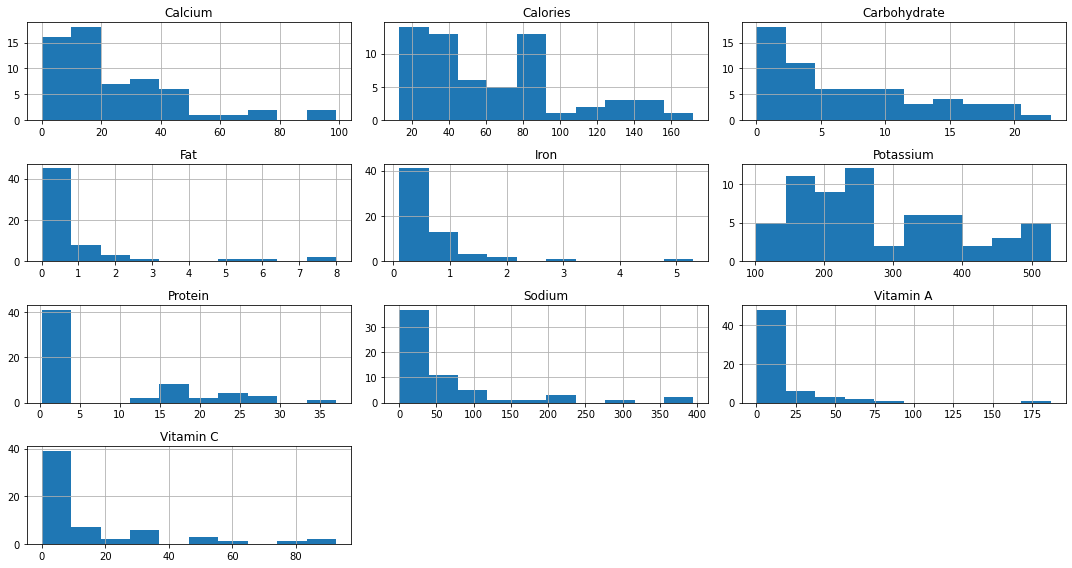

In [5]:
# plot the histogrm for each numerical variable
df_food.hist()

# adjust the subplots
plt.tight_layout()
  
# display the plot
plt.show()

**Interpretation:** The above histograms show that all the variables in the data are positively skewed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Plot the correlation between the various nutrients. And find the variables with the strongest correlation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

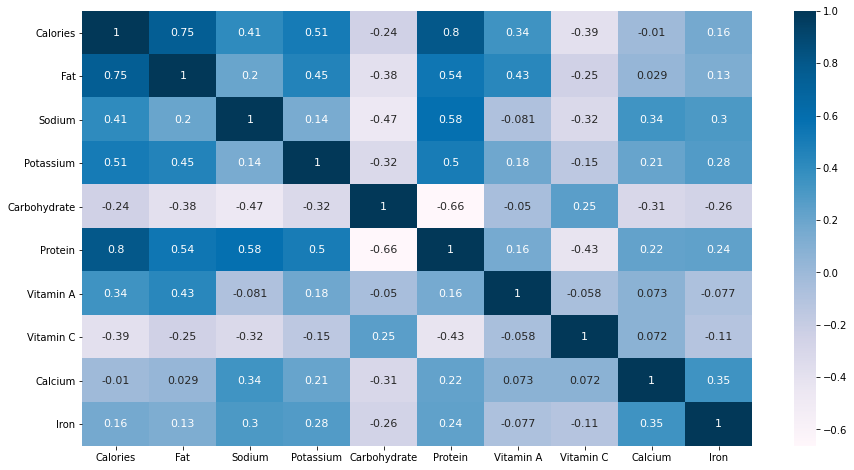

In [6]:
# plot the heatmap to visualize the correlation between the nutrients
# corr: give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cmap: assigns the color to each value 
sns.heatmap(df_food.corr(), annot = True, annot_kws = {"size": 11}, cmap = 'PuBu')

# display the plot
plt.show()

**Interpretation:** The diagonal entries show the correlation of a variable with itself; thus, it is always equal to 1. The strongest positive correlation is between `Protein` and `Calories` (i.e. 0.8). 

No two variables have the strongest negative correlation. But, there is a moderate negative correlation between `Protein` and `Carbohydrates` (i.e. -0.66).

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform the appropriate normalization technique to transform the variables to have minimum 0 and maximum 1 value.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# initialize the MinMaxScaler
scaler = MinMaxScaler()

# normalize all the columns of the dataframe 'df_food'
scaled_data = scaler.fit_transform(df_food)

# create a dataframe of normalized variables
# pass the required column names to the parameter 'columns'
df_scaled = pd.DataFrame(scaled_data, columns = df_food.columns)

# check the summary statistics of each variable
df_scaled.describe()

,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.312919,0.113361,0.142312,0.407258,0.295520,0.200362,0.066981,0.164094,0.242954,0.106274
std,0.249241,0.206380,0.227159,0.274735,0.274238,0.268359,0.158035,0.238958,0.219599,0.151156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.106918,0.020000,0.005063,0.199531,0.008757,0.015242,0.000000,0.010787,0.090909,0.030769
50%,0.251572,0.037500,0.040506,0.338028,0.218914,0.036473,0.000289,0.060410,0.161616,0.057692
75%,0.459119,0.116250,0.182278,0.600939,0.420315,0.439303,0.071658,0.198490,0.343434,0.121154
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Interpretation:** The above statistical summary shows that, the minimum and maximum value of each variable is 0 and 1 respectively. Thus, we have transformed all the variabels to the same scale.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Create a dictionary to store the cophenetic correlation coefficient for the following linkage methods: 'Single', 'Complete', and 'Average'. Identify which linkage method works best in quantifying the dissimilarities between the observations.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# find the linkage matrix with respect to 'single', 'complete' and 'average' linkage methods
# instantiate linkage object with scaled data and linkage method 
single_link = linkage(df_scaled, method = 'single')  

complete_link = linkage(df_scaled, method = 'complete')

avg_link = linkage(df_scaled, method = 'average')

In [9]:
# create an empty dictionary to store the cophenetic correlation coefficient for each method
out_dict = {}

# calculate the euclidean distance between the observations 
eucli_dist = euclidean_distances(df_scaled)

# the above code will return the matrix of 61x61
# consider only the array of upper triangular matrix
# k=1 considers the upper triangular values without the diagonal elements
dist_array = eucli_dist[np.triu_indices(61, k = 1)]

# pass the linkage matrix for different methods and the actual euclidean distance
# 1st output of the cophenet() is the correlation coefficient
coeff_single, cophenet_dist = cophenet(single_link, dist_array)

coeff_comp, cophenet_dist = cophenet(complete_link, dist_array)

coeff_avg, cophenet_dist = cophenet(avg_link, dist_array)

# add the linkage method as key and correlation coefficient as the value to the dictionary 'out_dict'
# the 'update()' adds a new element to the dictionary 
out_dict.update({'Single Linkage': coeff_single, 
                 'Complete Linkage': coeff_comp,
                 'Average Linkage': coeff_avg})

# print the dictionary
print(out_dict)

{'Single Linkage': 0.7909583288433946, 'Complete Linkage': 0.7750472694670165, 'Average Linkage': 0.8511247911173967}


**Interpretation:** The above dictionary represents the cophenetic correlation coefficient for different linkage methods. The coefficient for the `average` linkage method is the highest. Thus, we can conclude that this linkage method works best in quantifying the dissimilarities between the observations among the three linkages.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the dendrogram using the 'ward' linkage method and decide the optimal number of clusters. 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

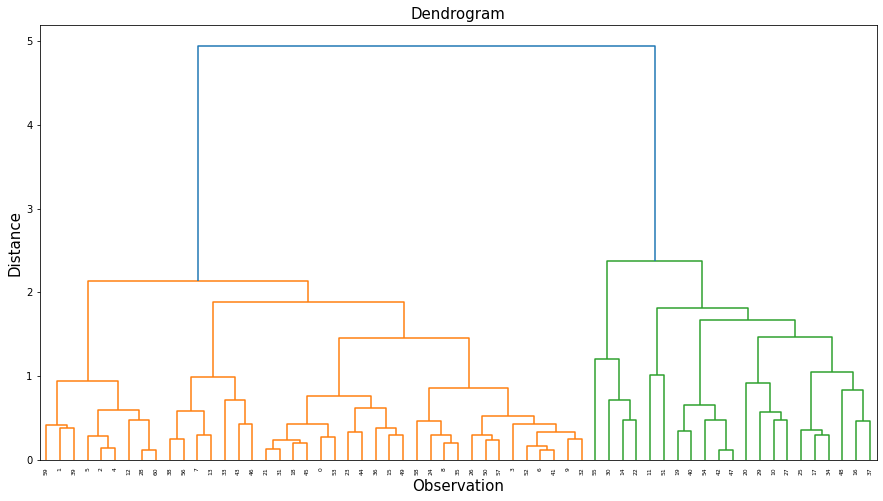

In [10]:
# obtain the linkage matrix using ward linkage
# pass the scaled data and linkage method
linkage_mat = linkage(df_scaled, method = 'ward')

# plot the dendrogram
# pass the above linkage matrix
dendro = dendrogram(linkage_mat)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Observation', fontsize = 15 )
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The different clusters are represented by green and orange color. Finally, these two clusters are merging into a single cluster. The dendrogram shows that the number of clusters remains 2 for the maximum distance. Thus, we can conclude that the optimal number of clusters is 2.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build the optimal number of clusters as per the previous question and interpret them.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

The dendrogram in the previous question shows that the optimal number of clusters is 2. Now let us group the data into 2 clusters and interpret the clusters.

In [11]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
clustering = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')

# fit the model on the scaled data
clustering.fit(df_scaled)

# add a column containing cluster label to the original data
# the 'labels_' returns the cluster number for each observation
df_food['Cluster'] = clustering.labels_

#### Let us interpret both the clusters.

### Cluster 1

#### Check the summary statistics for the food items in the 1st cluster.

In [12]:
# statistical summary of the numerical variables
df_food[df_food.Cluster==0].describe()

,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron,Cluster
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,103.190476,2.170000,138.904762,351.714286,0.742857,19.947143,18.820048,2.314286,33.009524,1.036190,0.0
std,34.157897,2.347803,110.790751,118.460180,1.363661,6.891236,44.060880,6.134353,31.448401,1.158393,0.0
min,23.000000,0.300000,35.000000,167.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.100000,0.0
25%,82.000000,0.700000,56.000000,246.000000,0.000000,16.400000,0.000000,0.000000,9.000000,0.400000,0.0
50%,92.000000,1.300000,95.000000,370.000000,0.000000,18.400000,0.000000,0.000000,18.200000,0.700000,0.0
75%,130.000000,1.900000,213.000000,451.000000,0.200000,24.000000,22.110000,2.900000,53.000000,1.000000,0.0
max,172.000000,8.000000,395.000000,528.000000,3.800000,37.000000,187.000000,28.000000,99.000000,5.300000,0.0


#### Let us check the food items present in this cluster.

In [13]:
# the 'index' of the dataframe displays the food item 
# check the food items in the 1st cluster
df_food[df_food.Cluster==0].index

Index(['Pollock', 'Octopus', 'Salmon', 'Scallops', 'Orange Roughy', 'Tuna',
       'Blue Crab', 'Swordfish', 'Squid', 'Shrimp', 'Haddock', 'Catfish',
       'Sole', 'Ocean Perch', 'Halibut', 'Rockfish', 'Cod', 'Lobster',
       'Spinach', 'Tilapia', 'Rainbow Trout'],
      dtype='object', name='Food')

**Interpretation:** This cluster contains 21 food items with high amount of nutrients like proteins, vitamins and minerals (sodium, calcium, iron, potassium). Also these are high calorie products. 

This cluster represents the seafood variety (except for spinach). Thus, we can segment this group under `Seafood`. We can see that spinach is included in this cluster, as it is a prominent source of vitamins and minerals.

### Cluster 2

#### Check the summary statistics for the food items in the 2nd cluster.

In [14]:
# statistical summary of the numerical variables
df_food[df_food.Cluster==1].describe()

,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron,Cluster
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,41.525000,0.243750,12.800000,235.475000,9.90325,1.150250,9.220750,21.982500,19.350000,0.451250,1.0
std,21.797421,0.238432,21.831758,95.426704,5.45671,0.667531,17.762678,24.474706,12.412876,0.376204,0.0
min,13.000000,0.000000,0.000000,102.000000,2.23000,0.260000,0.000000,0.000000,2.000000,0.100000,1.0
25%,25.000000,0.117500,1.000000,163.750000,5.60000,0.700000,0.017750,5.450000,9.750000,0.225000,1.0
50%,35.000000,0.175000,2.500000,228.500000,9.15000,0.920000,0.144000,9.850000,16.000000,0.340000,1.0
75%,54.000000,0.285000,15.250000,302.250000,14.02250,1.412500,9.350000,34.075000,30.750000,0.540000,1.0
max,89.000000,1.180000,80.000000,490.000000,22.84000,3.200000,67.000000,92.700000,47.000000,2.140000,1.0


#### Let us check the food items present in this cluster.

In [15]:
# the 'index' of the dataframe displays the food item 
# check the food items in the 2nd cluster
df_food[df_food.Cluster==1].index

Index(['Honeydew_Melon', 'Potato', 'Sweet Corn', 'Celery', 'Pomegranates',
       'Cherries', 'Tomato', 'Strawberries', 'Beetroot', 'Cucumber', 'Grapes',
       'Bell Pepper', 'Tangerine', 'Watermelon', 'Plums', 'Lime', 'Pumpkin',
       'French Beans', 'Apple', 'Peach', 'Eggplant', 'Sweet Lime', 'Carrot',
       'Pineapple', 'Cauliflower', 'Sweet Potato', 'Summer_Squash',
       'Kiwifruit', 'Cabbage', 'Onion', 'Broccoli', 'Mango', 'Leaf Lettuce',
       'Radishes', 'Grapefruit', 'Cantaloupe', 'Asparagus', 'Mushrooms',
       'Banana', 'Pear'],
      dtype='object', name='Food')

**Interpretation:** This cluster contains 40 food items with high amount of nutrients like carbohydrates, vitamins and minerals (calcium, potassium).

This cluster represents variety of fruits and vegetables. Thus, we can segment this group under `Fruits & Vegetables`.